In [1]:
# Data modification
import pandas as pd
import numpy as np
import pyam

# Geospatial
import geopandas as gpd

# System
from pathlib import Path
from pyam import IamDataFrame
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
# Plotting
import matplotlib.pyplot as plt

# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
out_dir = Path.cwd() / ".." / "output_data"

In [3]:
out_fig_dir = Path.cwd() / ".." / "output_figures"

In [4]:
input_dir = Path(r"D:\CA\Forest Navigator\forest_data_analysis\input_data")

In [6]:
#input_dir = Path.cwd() / ".." / "input_data"

# Get a list of EU countries
#sheets_dict = pd.read_excel(f"{input_dir}/FN_WP5_Feedstocks_High_Bioenergy_v2_shared.xlsx", sheet_name=None)

#sheet_name = []
#for k in sheets_dict.keys():
 #   if k != "Cover" and k != "info":
  #      sheet_name.append(k)

In [8]:
# Length = 28
#len(sheet_name)

In [9]:
# Scenario data is a processed dataset, it is stored in output_data directory
master_df = pyam.IamDataFrame(pd.read_csv(input_dir / "master_scenarios_aggregated.csv"))

In [10]:
# The shape of the master_dataset (41160, 8)
master_df.timeseries().shape

(41160, 8)

In [11]:
# Available scenarios
master_df.scenario

['BioEnerHigh', 'BioEnerLow', 'LimFor']

In [12]:
# To plot the sectoral breakdown of bioenergy demand
master_df.filter(variable="*Demand").variable

['Electricity And District Heat Demand',
 'Household Demand',
 'Industry Demand',
 'Tertiary And Other Demand',
 'Transport Demand']

In [13]:
# List of years to show
years = range(2015, 2055, 5)

In [14]:
# Select all scenario of sectoral bioenergy demand in 2030 for Germany
scenarios = ['BioEnerHigh', 'BioEnerLow', 'LimFor']
de_bio_demand = master_df.filter(
    variable="*Demand", 
    region="DE", 
    scenario=scenarios, 
    unit="EJ", 
    year=years
)

In [15]:
de_bio_demand.timeseries()

2015  \
model     scenario    region variable                             unit             
D5.1 Data BioEnerHigh DE     Electricity And District Heat Demand EJ    0.738053   
                             Household Demand                     EJ    0.287523   
                             Industry Demand                      EJ    0.213561   
                             Tertiary And Other Demand            EJ    0.123913   
                             Transport Demand                     EJ    0.135231   
          BioEnerLow  DE     Electricity And District Heat Demand EJ    0.738250   
                             Household Demand                     EJ    0.287178   
                             Industry Demand                      EJ    0.213752   
                             Tertiary And Other Demand            EJ    0.123870   
                             Transport Demand                     EJ    0.135231   
          LimFor      DE     Electricity And District Heat Demand EJ    0.738250   
                             Household Demand                     EJ    0.287178   
                             Industry Demand                      EJ    0.213752   
                             Tertiary And Other Demand            EJ    0.123870   
                             Transport Demand                     EJ    0.135231   

                                                                            2020  \
model     scenario    region variable                             unit             
D5.1 Data BioEnerHigh DE     Electricity And District Heat Demand EJ    0.742543   
                             Household Demand                     EJ    0.311502   
                             Industry Demand                      EJ    0.202588   
                             Tertiary And Other Demand            EJ    0.127919   
                             Transport Demand                     EJ    0.158243   
          BioEnerLow  DE     Electricity And District Heat Demand EJ    0.742545   
                             Household Demand                     EJ    0.311502   
                             Industry Demand                      EJ    0.202354   
                             Tertiary And Other Demand            EJ    0.127920   
                             Transport Demand                     EJ    0.158256   
          LimFor      DE     Electricity And District Heat Demand EJ    0.742545   
                             Household Demand                     EJ    0.311502   
                             Industry Demand                      EJ    0.202354   
                             Tertiary And Other Demand            EJ    0.127920   
                             Transport Demand                     EJ    0.158256   

                                                                            2025  \
model     scenario    region variable                             unit             
D5.1 Data BioEnerHigh DE     Electricity And District Heat Demand EJ    0.796765   
                             Household Demand                     EJ    0.268027   
                             Industry Demand                      EJ    0.209360   
                             Tertiary And Other Demand            EJ    0.142127   
                             Transport Demand                     EJ    0.185312   
          BioEnerLow  DE     Electricity And District Heat Demand EJ    0.684892   
                             Household Demand                     EJ    0.261705   
                             Industry Demand                      EJ    0.182681   
                             Tertiary And Other Demand            EJ    0.138132   
                             Transport Demand                     EJ    0.275771   
          LimFor      DE     Electricity And District Heat Demand EJ    0.684830   
                             Household Demand                     EJ    0.262931   
                             Industry Dema

In [16]:
print(input_dir)

D:\CA\Forest Navigator\forest_data_analysis\notebook\..\input_data


In [19]:
country_borders = gpd.read_file(input_dir / f"WORLD_BORDERS/TM_WORLD_BORDERS-0.3.shp").set_index("ISO2")

# FR to-do: Subset to EU countries

In [20]:
country_borders.head()

,FIPS,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,_count_2,_sum_2,geometry
ISO2,,,,,,,,,,,,,
AG,AC,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,755.0,0.0,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
DZ,AG,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,4239346.0,22749.0,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
AZ,AJ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,157178.0,14344.0,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,52006.0,22255.0,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,54270.0,5167.0,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


In [21]:
# Filter to DE 
de_borders = country_borders.loc[["DE"]]

In [22]:
de_borders

,FIPS,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,_count_2,_sum_2,geometry
ISO2,,,,,,,,,,,,,
DE,GM,DEU,276,Germany,34895,82652369,150,155,9.851,51.11,651325.0,70693.0,"MULTIPOLYGON (((8.71026 47.69681, 8.67860 47.6..."


<Axes: >

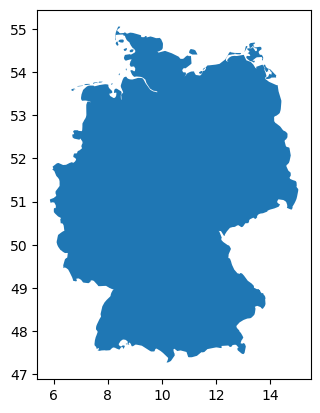

In [23]:
de_borders.plot()

In [24]:
from ipywidgets import interact, IntSlider
import mpld3
from matplotlib.animation import FuncAnimation

MovieWriter imagemagick unavailable; using Pillow instead.
[WARNING] 10:40:21 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:21 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:21 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:21 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:23 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:23 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:23 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:23 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:25 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:25 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:25 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:25 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:27 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:27 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:27 - pyam.core: Filtered IamD

Animation saved for scenario: BioEnerHigh


[WARNING] 10:40:39 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:39 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:39 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:39 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:40 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:41 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:41 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:41 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:42 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:42 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:42 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:42 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:44 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:45 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:45 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:45 - pyam.core: Filtered

Animation saved for scenario: BioEnerLow


[WARNING] 10:40:57 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:57 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:57 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:57 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:58 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:59 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:59 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:40:59 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:41:00 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:41:01 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:41:01 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:41:01 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:41:02 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:41:02 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:41:02 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:41:02 - pyam.core: Filtered

Animation saved for scenario: LimFor


[WARNING] 10:41:15 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:41:15 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:41:15 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:41:15 - pyam.core: Filtered IamDataFrame is empty!


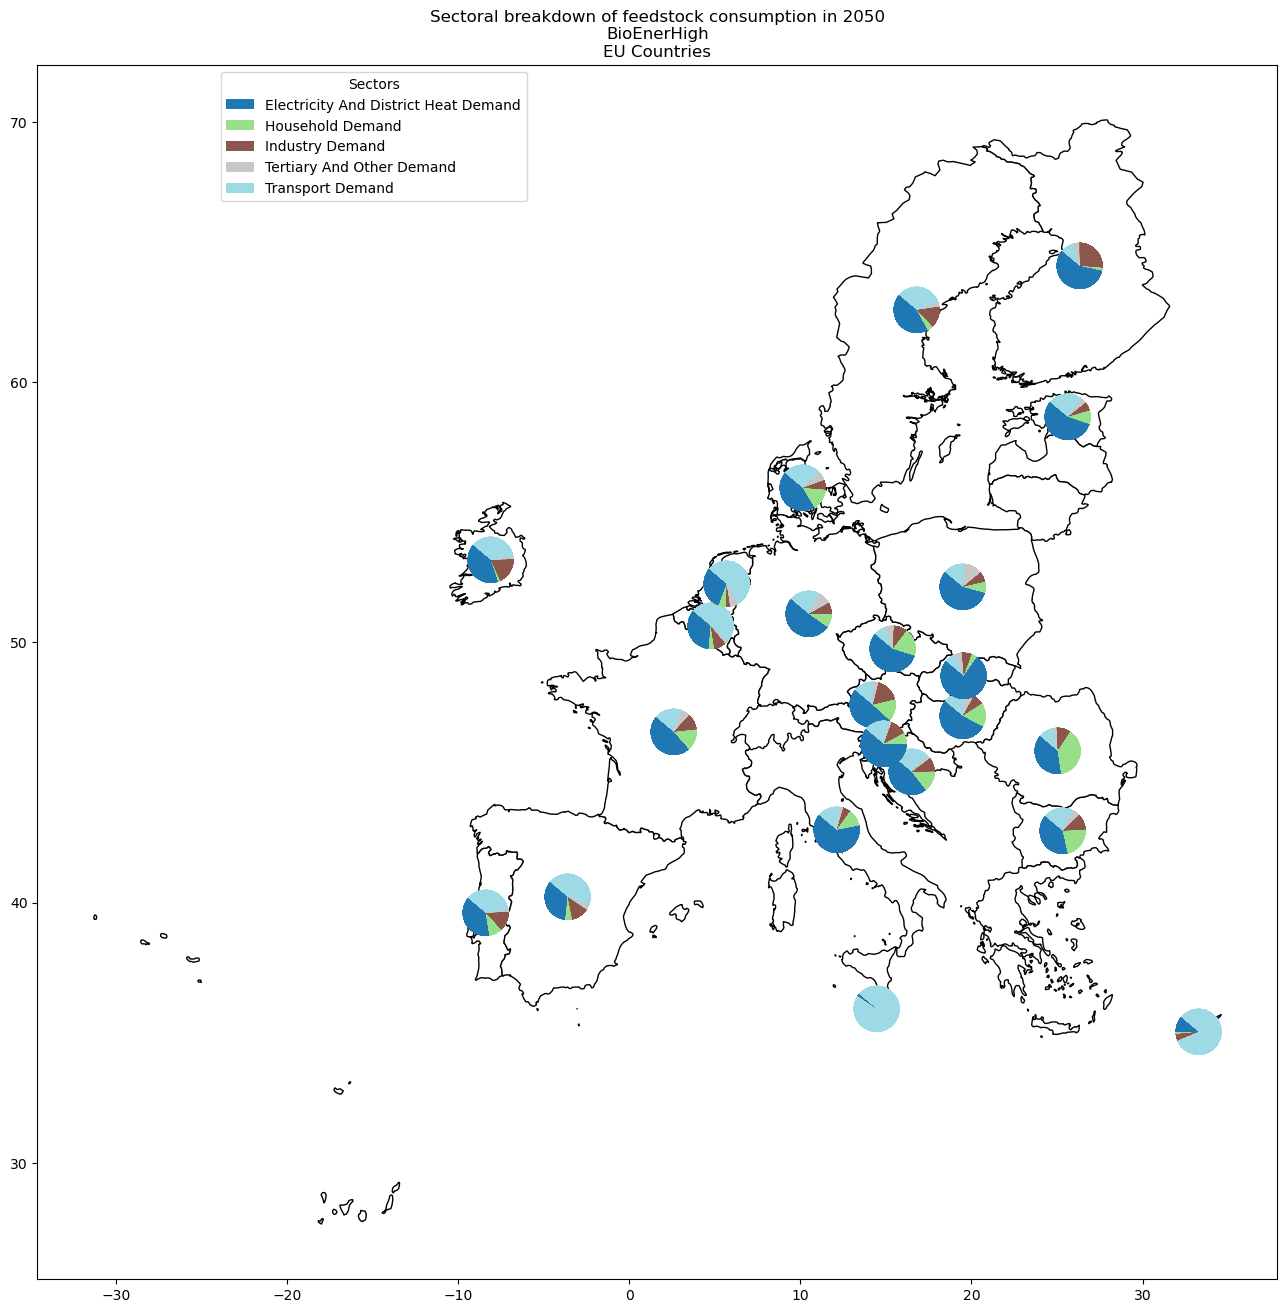

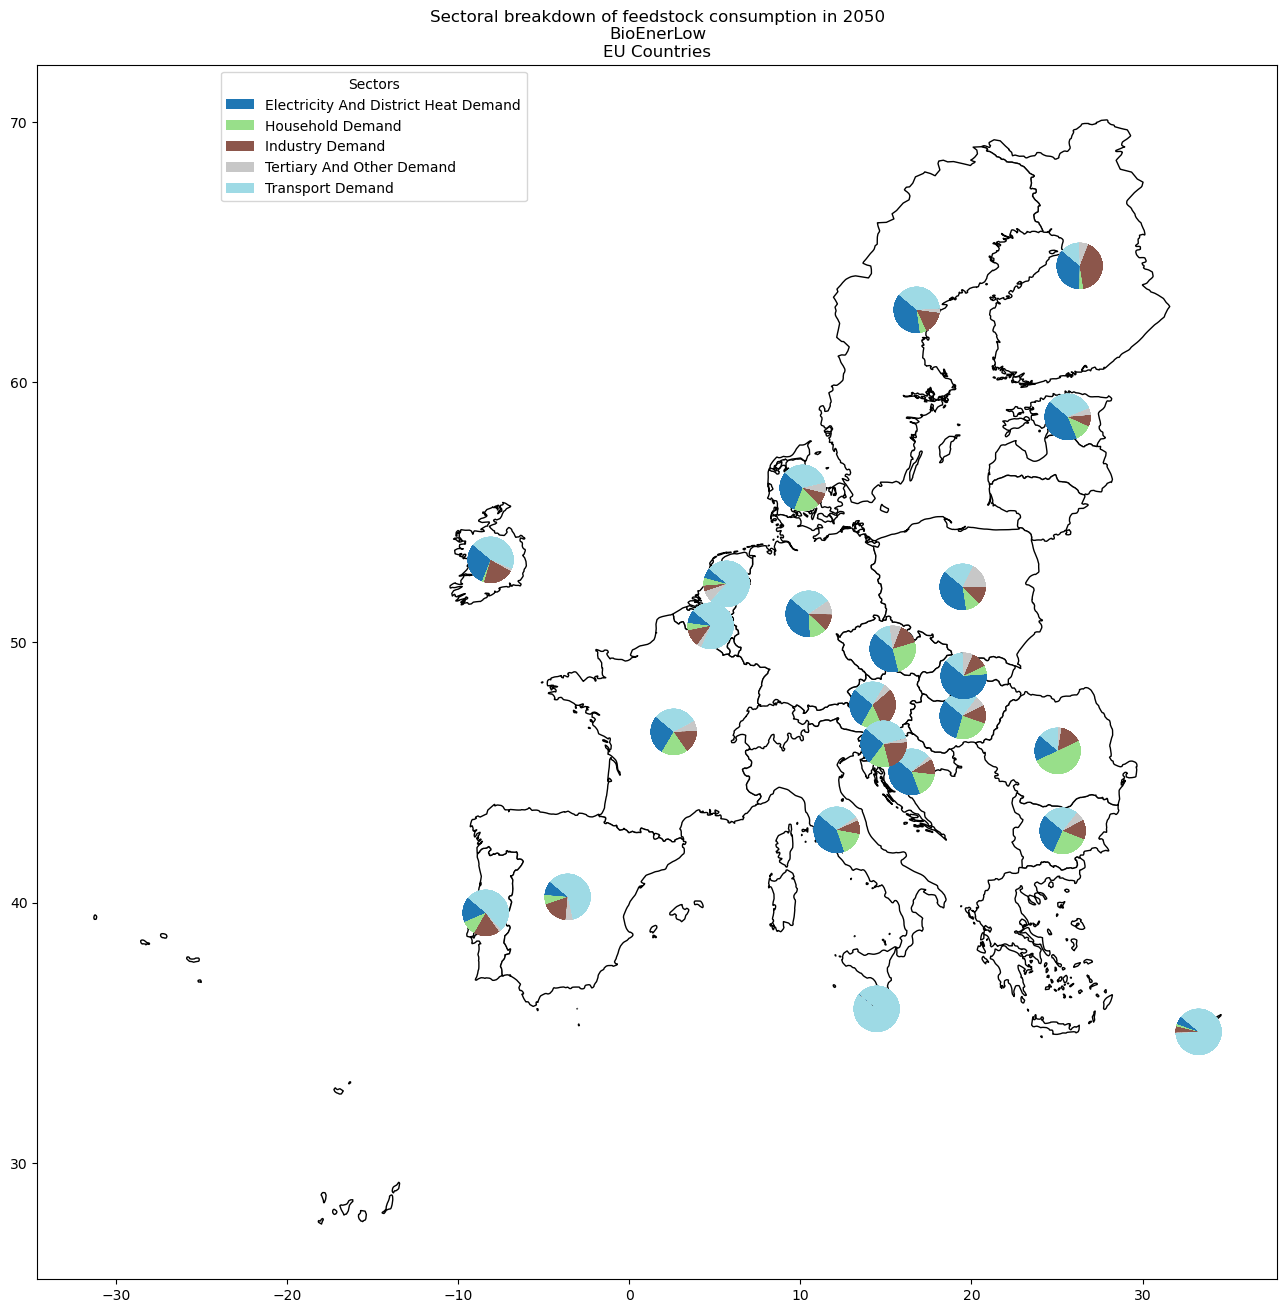

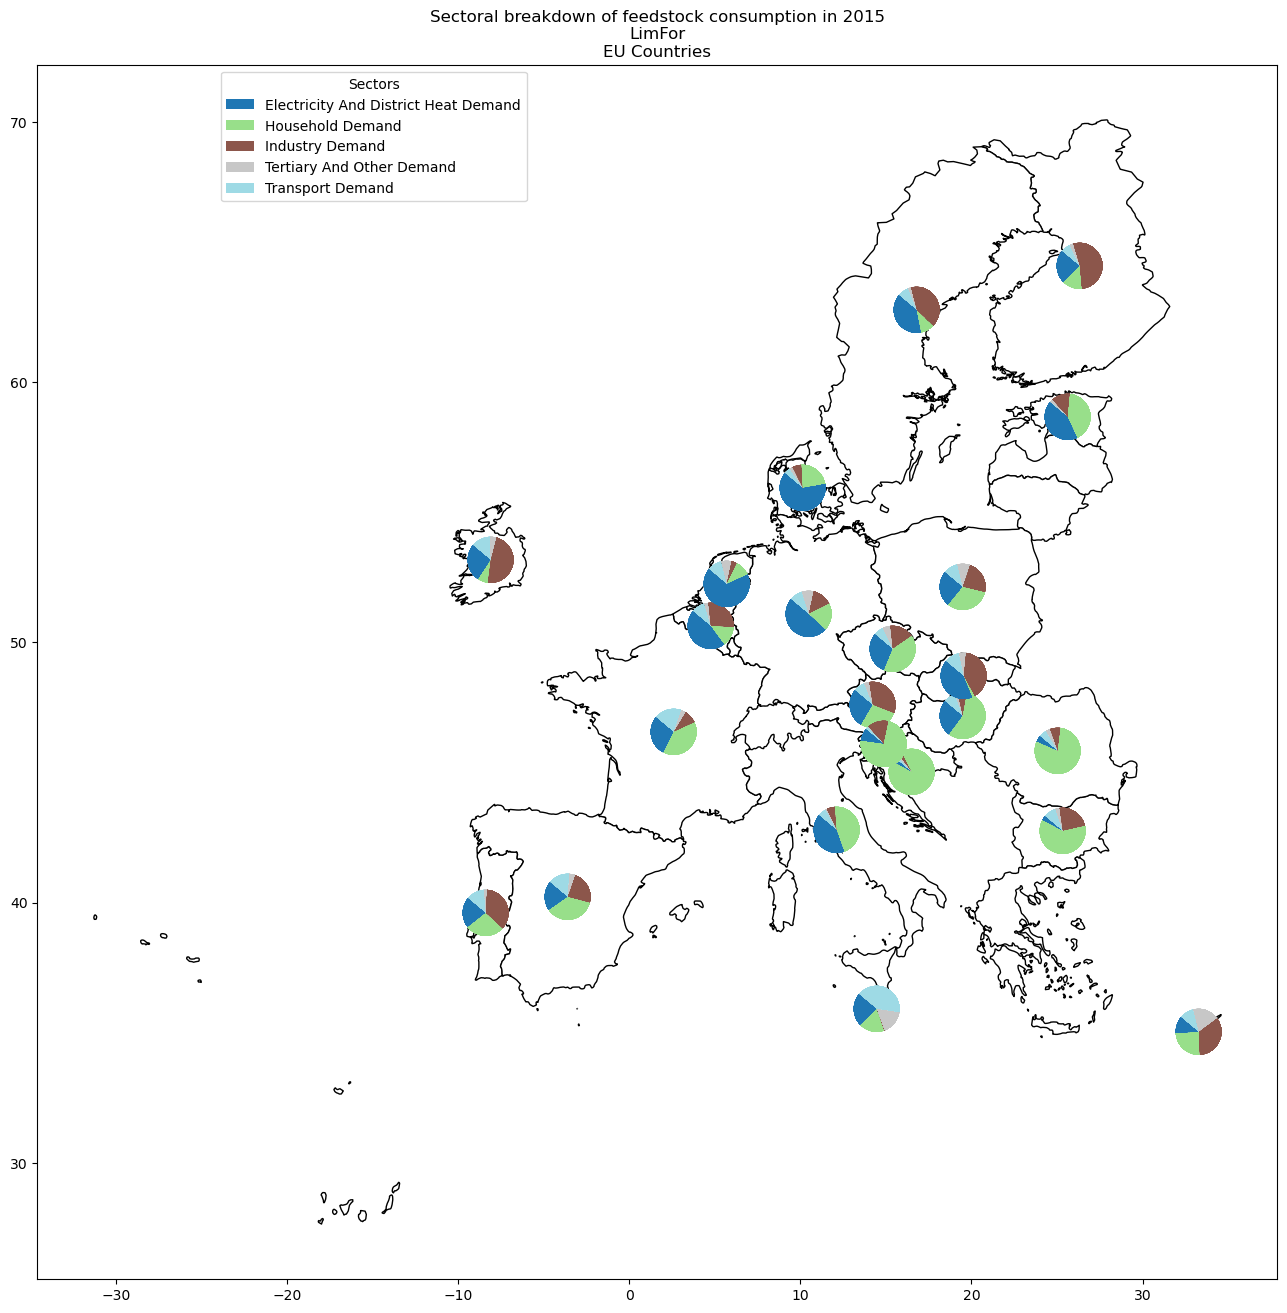

In [27]:
# List of EU countries
eu_countries = [
    "AT", "BE", "BG", "HR", "CY", "CZ", "DK", "EE", "FI", "FR", "DE",
    "GR", "HU", "IE", "IT", "LV", "LT", "LU", "MT", "NL", "PL", "PT",
    "RO", "SK", "SI", "ES", "SE"
]

# Filter to EU countries
eu_borders = country_borders.loc[eu_countries]

# Function to create a pie chart as an image
def pie_image(sizes, colors=None):
    fig, ax = plt.subplots()
    wedges, _ = ax.pie(sizes, labels=None, startangle=140, colors=colors)
    ax.axis('equal')
    fig.patch.set_alpha(0)  # Set the figure background to be transparent
    ax.patch.set_alpha(0)   # Set the axes background to be transparent
    
    fig.canvas.draw()
    
    # Create an image from the figure, ensuring transparency
    image = np.frombuffer(fig.canvas.tostring_argb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    plt.close(fig)
    
    # Reorder ARGB to RGBA
    image = image[:, :, [1, 2, 3, 0]]
    return image, wedges

# Years to plot
years = [2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]

# Scenarios to plot
scenarios = ['BioEnerHigh', 'BioEnerLow', 'LimFor']

# Function to create animations for each scenario
def create_animation(scenario):
    fig, ax = plt.subplots(figsize=(16, 16))

    # Plot the base map
    base = eu_borders.plot(ax=ax, color='white', edgecolor='black')

    # Function to update the plot for each frame
    def update(year):
        ax.clear()
        base = eu_borders.plot(ax=ax, color='white', edgecolor='black')

        all_wedges = []  # For legend
        all_labels = []  # For legend
        
        for country_code in eu_countries:
            # Filter data for the specific country, scenario, and year
            country_demand = master_df.filter(
                variable="*Demand", 
                region=country_code, 
                scenario=scenario, 
                unit="EJ", 
                year=year
            )

            # Skip countries with no data
            if country_demand.empty:
                continue

            # Prepare data for pie chart
            sizes = country_demand.timeseries().values.flatten()
            variables = country_demand.timeseries().index.get_level_values('variable').unique()

            # Generate colors for the pie chart
            colors = plt.cm.tab20(np.linspace(0, 1, len(sizes)))

            # Calculate the centroid of the country
            centroid = eu_borders.loc[country_code].geometry.centroid

            # Create a pie chart image
            pie_img, wedges = pie_image(sizes, colors=colors)
            all_wedges = wedges
            all_labels = variables

            # Use a fixed zoom value for the pie size
            zoom = 0.1  # Adjust this zoom factor as needed

            # Create an AnnotationBbox with the pie chart image
            imagebox = OffsetImage(pie_img, zoom=zoom)
            ab = AnnotationBbox(imagebox, (centroid.x, centroid.y), frameon=False)
            
            # Add the AnnotationBbox to the plot
            ax.add_artist(ab)

        # Set the title for the current year and scenario
        ax.set_title(f"Sectoral breakdown of feedstock consumption in {year}\n{scenario}\nEU Countries")

        # Add the legend for pie chart colors
        ax.legend(all_wedges, all_labels, title="Sectors", loc="upper right", bbox_to_anchor=(0.4, 1))

    # Create the animation
    ani = FuncAnimation(fig, update, frames=years, repeat=True)

    # Save the animation as a GIF
    ani.save(out_fig_dir / f'EU_feedstock_consumption_{scenario}.gif', writer='imagemagick', fps=1)
    print(f"Animation saved for scenario: {scenario}")

# Generate animations for all scenarios
for scenario in scenarios:
    create_animation(scenario)

In [ ]:
# Filter to EU countries
eu_borders = country_borders.loc[eu_countries]

# Function to create a pie chart as an image
def pie_image(sizes, colors=None):
    fig, ax = plt.subplots()
    wedges, _ = ax.pie(sizes, labels=None, startangle=140, colors=colors)
    ax.axis('equal')
    fig.patch.set_alpha(0)  # Set the figure background to be transparent
    ax.patch.set_alpha(0)   # Set the axes background to be transparent
    
    fig.canvas.draw()
    
    # Create an image from the figure, ensuring transparency
    image = np.frombuffer(fig.canvas.tostring_argb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    plt.close(fig)
    
    # Reorder ARGB to RGBA
    image = image[:, :, [1, 2, 3, 0]]
    return image

# Years and scenarios to plot
years = [2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]
scenarios = ["BioEnerHigh", "BioEnerLow", "LimFor"]

# Loop through each scenario
for scenario in scenarios:
    # Loop through each year and save the respective plot
    for year in years:
        # Create the plot
        fig, ax = plt.subplots(1, 1, figsize=(16, 16))
        
        # Plot EU borders
        eu_borders.plot(ax=ax, color='white', edgecolor='black')
        
        # Prepare to collect legend handles and labels
        legend_handles = []
        legend_labels = []

        # Loop through each EU country and plot the respective pie chart
        for country_code in eu_countries:
            # Filter data for the specific country, year, and scenario
            country_demand = master_df.filter(
                variable="*Demand", 
                region=country_code, 
                scenario=scenario, 
                unit="EJ", 
                year=year
            )

            # Skip countries with no data
            if country_demand.empty:
                continue

            # Prepare data for pie chart
            sizes = country_demand.timeseries().values.flatten()
            variables = country_demand.timeseries().index.get_level_values('variable').unique()
            
            # Generate colors for the pie chart
            colors = plt.cm.tab20(np.linspace(0, 1, len(sizes)))

            # Add color and label for legend
            if not legend_handles:
                # Generate a dummy pie chart to get the handles for the legend
                fig_dummy, dummy_ax = plt.subplots()
                wedges, _ = dummy_ax.pie(sizes, colors=colors, labels=variables)
                plt.close(fig_dummy)
                legend_handles = wedges
                legend_labels = variables

            # Calculate the centroid of the country
            centroid = eu_borders.loc[country_code].geometry.centroid

            # Create a pie chart image
            pie_img = pie_image(sizes, colors=colors)

            # Use a fixed zoom value for the pie size
            zoom = 0.1  # Adjust this zoom factor as needed

            # Create an AnnotationBbox with the pie chart image
            imagebox = OffsetImage(pie_img, zoom=zoom)
            ab = AnnotationBbox(imagebox, (centroid.x, centroid.y), frameon=False)
            
            # Add the AnnotationBbox to the plot
            ax.add_artist(ab)
        
        # Create a custom legend for the pie chart colors
        ax.legend(legend_handles, legend_labels, title="Sectors", loc="upper right", bbox_to_anchor=(1, 1))

        # Set the title and layout
        ax.set_title(out_fig_dir / f"Sectoral breakdown of feedstock consumption in {year}\n{scenario}\nEU Countries")
        plt.tight_layout()

        # Save the plot as an image file
        plt.savefig(f"EU_feedstock_consumption_{scenario}_{year}.png")
        plt.close(fig)

[WARNING] 10:53:18 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:53:18 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:53:18 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:53:18 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:53:20 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:53:21 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:53:21 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:53:21 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:53:23 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:53:23 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:53:23 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:53:23 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:53:25 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:53:25 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:53:25 - pyam.core: Filtered IamDataFrame is empty!
[WARNING] 10:53:25 - pyam.core: Filtered